# Project ProRail 

In [1]:
# libraries importeren 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset inlezen 
df = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False)

In [3]:
# Alle kolommen die niet van toepassing zijn worden verwijdert.
df = df.drop(['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 
         'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 
         'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 
         'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 
         'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt', 
         'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
         'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum',
         'stm_mon_eind_tijd', 'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon',
         'stm_fact_jn', 'stm_akkoord_melding_jn', 'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd',
         'stm_rec_toegev_ddt', 'stm_hinderwaarde', 'stm_actie', 'stm_standplaats', 'stm_status_gebr',
         'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_schadenr',
         'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig', 'stm_relatiervo_volgend',
         'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd', 'stm_sorteerveld',
         'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
         'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt',
         'stm_x_vervallen_ind'], axis='columns')

In [4]:
df.head()

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,...,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,...,09:00:00,0.0,99999999.0,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN
2,2,50053213,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,...,13:26:00,51.0,99999999.0,02/01/2006,13:26:00,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,...,17:20:00,40.0,99999999.0,02/01/2006,17:20:00,Persoon langs de baan,NaN,NaN,Hgl,NaN
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,...,22:36:00,6.0,99999999.0,02/01/2006,22:36:00,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN


De hersteltijd is vanaf de melding totdat de probleem is opgelost.Hierdoor hadden we de kolom **stm_fh_duur** genomen als onze target variabel. Dit zal de kolom zijn die we moet gaan voorspellen.

In [5]:
# de target variabel in een variabel stoppen.
data = df['stm_fh_duur']
data

0            NaN
1            0.0
2           51.0
3           40.0
4            6.0
5            7.0
6           13.0
7           15.0
8           30.0
9            0.0
10           0.0
11          29.0
12           0.0
13          24.0
14           1.0
15          53.0
16         120.0
17          11.0
18          38.0
19          19.0
20           3.0
21           0.0
22          20.0
23           5.0
24          25.0
25          82.0
26           8.0
27           0.0
28          47.0
29          65.0
           ...  
898496     100.0
898497       0.0
898498       0.0
898499       0.0
898500       0.0
898501       0.0
898502       0.0
898503       0.0
898504      40.0
898505      40.0
898506     150.0
898507     150.0
898508      63.0
898509      63.0
898510    2592.0
898511    2592.0
898512    2592.0
898513    2592.0
898514    2592.0
898515    2592.0
898516    2614.0
898517    2614.0
898518      25.0
898519      25.0
898520      83.0
898521      83.0
898522      83.0
898523      83

In [6]:
# alle ontbrekende waardes verwijderen.
#We hadden alle waarde boven de 0.0 gepakt, omdat de reparatietijd  van 0.0 kan een kwestie zijn van een verkeerde invoer.
data = data.dropna()
data = data.loc[data>0.0]

In [7]:
#De attributen van de target variabel zien 
data.describe()

count    726775.000000
mean       1141.258427
std        7103.560208
min           1.000000
25%          54.000000
50%         120.000000
75%         378.000000
max      528297.000000
Name: stm_fh_duur, dtype: float64

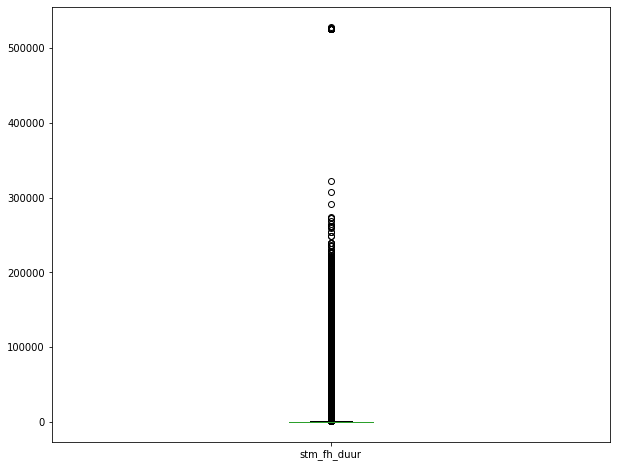

In [8]:
#Boxplot tekenen van de target variabel
data.plot.box(figsize=(10, 8))

In [9]:
data = data.sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = data[(data<=q1-1.5*iqr)&(data>q1-3*iqr)].count()
sterke_lower = data[data<q1-3*iqr].count()
zwakke_upper = data[(data>=q3+1.5*iqr)&(data<q3+3*iqr)].count()
sterke_upper = data[data>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(data)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))
print("Aantal sterke outliers onder de boxplot : {}, tussen de {} en {}".format(q1-1.5*iqr, q1-3*iqr, zwakke_lower))
print("Aantal sterke outliers onder de boxplot : {}, onder de ".format(q1-3*iqr, sterke_lower))

Q1 = 54.0, Q3 = 378.0
IQR = Q3 - Q1 = 54.0 - 378.0 = 324.0
Lengte van de data : 726775

Aantal sterke outliers boven de boxplot, boven de 1350.0 : 73187
Aantal zwakke outliers boven de boxplot, tussen 864.0 en 1350.0 : 43914
Aantal sterke outliers onder de boxplot : -432.0, tussen de -918.0 en 0
Aantal sterke outliers onder de boxplot : -918.0, onder de 


Aan de hand van de boxplot en de bovenstaande berekening, komen er veel outliers voor boven de boxplot. Er is te zien dat de outliers een invloed hebben op de gemiddelde ten opzichte van de mediaan. Deze outlier kan een negatieve invloed hebben op de accuracy van onze voorspellingen.

## Baseline model ontwikkelen

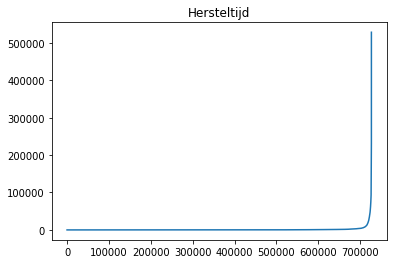

In [10]:
# Onze target variabel plotten in een 
x = range(0,len(data))
plt.plot(x,data)

plt.title('Hersteltijd')
plt.show()

In [11]:
len(data[data < data.mean()])

638074

In [12]:
len(data[data < data.mean()])/len(data)*100

87.79525988098105

In [13]:
print(len(data[data < data.median()]))
print(len(data[data > data.median()]))

363249
361597


Voor 88% van alle hersteltijd, duren korter dan 1141 minuten (+- 19 uur) <br>
Voor 50% van alle hersteltijd, duren korter/langer dan 120 minuten(2 uren)<br>

We gaan twee baseline model bouwen waar onze voorspelde reparatietijd is altijd gelijk aan de gemiddeld en de mediaan

In [14]:
data = data.to_frame() # zet om  Series naar dataframe
# Voeg twee 
data['Median']=  data['stm_fh_duur'].median()
data['Mean'] = data['stm_fh_duur'].mean()

In [15]:
data.head()

,stm_fh_duur,Median,Mean
716924,1.0,120.0,1141.258427
140064,1.0,120.0,1141.258427
536888,1.0,120.0,1141.258427
461109,1.0,120.0,1141.258427
268409,1.0,120.0,1141.258427


In [16]:
# De kwaliteit/score van de model bepalen mbh van RMSE
np.sqrt(mean_squared_error(data.loc[:,'stm_fh_duur'],data.loc[:,'Median']))

7176.591598082251

In [17]:
# De kwaliteit/score van de model bepalen mbh van RMSE
np.sqrt(mean_squared_error(data.loc[:,'stm_fh_duur'],data.loc[:,'Mean']))

7103.555320523756

### Conclusie voor de baseline model 

Er is voor onze baseline model  gekozen om  de mediaan als   voorspelde  waarde te gebruiken, omdat de mediaan is niet gevoelig voor outliers.

In [18]:
print(str(df['stm_oorz_groep'].loc[df['stm_fh_duur'] == df['stm_fh_duur'].max()]))

670693    ONR-DERD
Name: stm_oorz_groep, dtype: object


In [19]:
df.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_meldtekst_lang', 'stm_sap_meldtekst',
       'stm_geo_mld', 'stm_geo_mld_uit_functiepl', 'stm_equipm_nr_mld',
       'stm_equipm_soort_mld', 'stm_equipm_omschr_mld', 'stm_km_van_mld',
       'stm_km_tot_mld', 'stm_prioriteit', 'stm_status_melding_sap',
       'stm_aanngeb_ddt', 'stm_oh_pg_gst', 'stm_geo_gst',
       'stm_geo_gst_uit_functiepl', 'stm_equipm_nr_gst',
       'stm_equipm_soort_gst', 'stm_equipm_omschr_gst', 'stm_km_van_gst',
       'stm_km_tot_gst', 'stm_oorz_groep', 'stm_oorz_code', 'stm_oorz_tkst',
       'stm_fh_ddt', 'stm_fh_status', 'stm_sap_storeind_ddt',
       'stm_tao_indicator', 'stm_tao_indicator_vorige',
       'stm_tao_soort_mutatie', 'stm_tao_telling_mutatie',
       'stm_tao_beinvloedbaar_indicator', 'stm_evb', 'stm_sap_melddatum',
       'stm_sap_meldtijd', 'stm_contractgeb_mld', 'stm_functiepl_mld',
       'stm_techn_mld', 'stm_contractgeb_gst', 'stm_fu

In [20]:
# Hierboven gaan we kijken naar de daadwerkelijk probleem van de maximale hersteltijd.

## Lineair Regression Model 

### Data Understanding

In [21]:
# kopie maken van de gekozen features en target variabelen van onze dataset 
df2  = df[['stm_oorz_groep', 'stm_oorz_code', 'stm_prioriteit', 'stm_fh_duur']].copy()
df2.head(10)

,stm_oorz_groep,stm_oorz_code,stm_prioriteit,stm_fh_duur
0,NaN,NaN,NaN,NaN
1,ONR-RIB,133.0,9.0,0.0
2,ONR-DERD,143.0,9.0,51.0
3,ONR-DERD,142.0,9.0,40.0
4,ONR-DERD,142.0,9.0,6.0
5,TECHONV,218.0,9.0,7.0
6,ONR-DERD,142.0,9.0,13.0
7,ONR-DERD,143.0,9.0,15.0
8,ONR-DERD,141.0,9.0,30.0
9,ONR-RIB,135.0,9.0,0.0


In [22]:
# attributen van df2 bekijken
df2.describe()

,stm_oorz_code,stm_prioriteit,stm_fh_duur
count,845113.000000,898365.000000,898488.000000
mean,193.577248,4.582593,923.148771
std,48.310779,2.262522,6404.546787
min,33.000000,1.000000,0.000000
25%,144.000000,2.000000,11.000000
50%,213.000000,4.000000,84.000000
75%,221.000000,5.000000,256.000000
max,999.000000,9.000000,528297.000000


In [23]:
# Aantal ontbrekende waardes bekijken 
df2.isnull().sum()

stm_oorz_groep    53430
stm_oorz_code     53413
stm_prioriteit      161
stm_fh_duur          38
dtype: int64

In [24]:
# bereken aantal rijen die wordt verloren bij Nan waardes
print('Rijen verloren door Nan oorzaakgroep : {}%'.format((53430/845113)*100))
print('Rijen verloren door Nan oorzaakcode  : {}%'.format((53413/845113)*100))

#totaal
print('Totaal aantal rijen verloren : {}'.format(((53430+53413+161+38)/845113)*100))

Rijen verloren door Nan oorzaakgroep : 6.322231464904693%
Rijen verloren door Nan oorzaakcode  : 6.320219899587393%
Totaal aantal rijen verloren : 12.665998511441664


In [25]:
# datatypes van de dataset bekijken 
df2.dtypes

stm_oorz_groep     object
stm_oorz_code     float64
stm_prioriteit    float64
stm_fh_duur       float64
dtype: object

In [26]:
df2['stm_oorz_groep'].unique()

array([nan, 'ONR-RIB', 'ONR-DERD', 'TECHONV', 'WEER'], dtype=object)

In [27]:
df2['stm_oorz_code'][df2['stm_oorz_code'].notnull()].sort_values().unique()

array([ 33.,  48.,  51., 130., 131., 132., 133., 134., 135., 136., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 154., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
       189., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 218., 219., 220., 221., 222.,
       223., 224., 225., 226., 227., 228., 229., 230., 231., 233., 234.,
       235., 239., 240., 241., 242., 250., 294., 298., 299., 999.])

In [28]:
oorzcodes = pd.read_csv('Oorzaakcodes.csv', delimiter = ';')
oorzcodes['Code'].sort_values().unique()

array([130, 131, 132, 133, 134, 135, 136, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 239, 240,
       241, 242, 250, 294, 298, 299], dtype=int64)

Aan de han van de bovenstaande code kunnnen we concluderen dat de we moeten df2 filteren die de rijen kiezen, waar de oorzaakcode tussen 130 en 299 zit. Of PO's vraag stellen over de code 33, 48 en 51, 999

In [29]:
df2[df2['stm_oorz_code'] == 33]

,stm_oorz_groep,stm_oorz_code,stm_prioriteit,stm_fh_duur
298991,ONR-RIB,33.0,2.0,215.0


In [30]:
df2[df2['stm_oorz_code'] == 48]

,stm_oorz_groep,stm_oorz_code,stm_prioriteit,stm_fh_duur
299290,ONR-DERD,48.0,4.0,2.0


In [31]:
df2[df2['stm_oorz_code'] == 51]

,stm_oorz_groep,stm_oorz_code,stm_prioriteit,stm_fh_duur
298519,ONR-DERD,51.0,4.0,9.0


In [32]:
# Deze 3 oorzaak codes hebben in totaal 3 rijen, dus we kunnen ze verwijderenn.

In [33]:
len(df2[df2['stm_oorz_code'] == 999])

102

In [34]:
df2['stm_oorz_code'][df2['stm_oorz_groep'] == 'TECHONV'].unique()


array([218., 299., 209., 221., 298., 215., 294., 220., 213., 212., 242.,
       214., 227., 219., 225., 211., 203., 233., 240., 241., 234., 999.,
       228., 224., 207., 208., 226., 210., 235., 223., 222., 201., 250.,
       229., 230., 231., 204., 145., 206., 205., 239., 133., 202., 135.,
       200., 147., 182.])

In [35]:
df2['stm_prioriteit'].unique()
# Er is geen rij/ storing met een prioriteit van 3 en 6 of 7. Bestaat ze well?
# En ja , kan et misschien die 161 Nan waardes zijn ?

array([nan,  9.,  5.,  4.,  2.,  1.,  8.])

In [36]:
df2.head(10)

,stm_oorz_groep,stm_oorz_code,stm_prioriteit,stm_fh_duur
0,NaN,NaN,NaN,NaN
1,ONR-RIB,133.0,9.0,0.0
2,ONR-DERD,143.0,9.0,51.0
3,ONR-DERD,142.0,9.0,40.0
4,ONR-DERD,142.0,9.0,6.0
5,TECHONV,218.0,9.0,7.0
6,ONR-DERD,142.0,9.0,13.0
7,ONR-DERD,143.0,9.0,15.0
8,ONR-DERD,141.0,9.0,30.0
9,ONR-RIB,135.0,9.0,0.0


In [37]:
df2.describe()

,stm_oorz_code,stm_prioriteit,stm_fh_duur
count,845113.000000,898365.000000,898488.000000
mean,193.577248,4.582593,923.148771
std,48.310779,2.262522,6404.546787
min,33.000000,1.000000,0.000000
25%,144.000000,2.000000,11.000000
50%,213.000000,4.000000,84.000000
75%,221.000000,5.000000,256.000000
max,999.000000,9.000000,528297.000000


In [38]:
# Frequentie tabel - histogram plotten van stm_prioriteit

In [39]:
# De meetniveau van stm_oorz_code is een discrete variabel - moeten we die aanpassen 

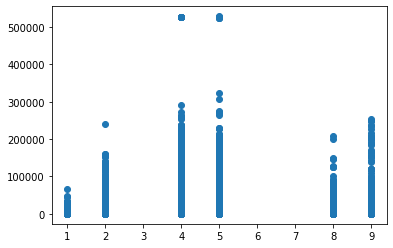

In [40]:
plt.scatter(df2['stm_prioriteit'],df2['stm_fh_duur'] )
plt.show()

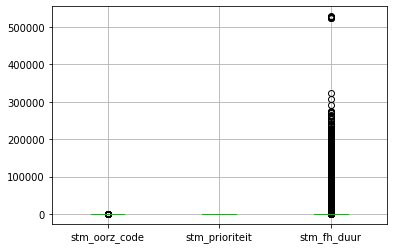

In [41]:
df2.boxplot()

In [42]:
# First glans is te zien dat er veel uitschieters voorkomen in de target variabel en niet bij de features.

Q1 = 144.0, Q3 = 221.0
IQR = Q3 - Q1 = 144.0 - 221.0 = 77.0
Lengte van de data : 898526

Aantal sterke outliers boven de boxplot, boven de 452.0 : 102
Aantal zwakke outliers boven de boxplot, tussen 336.5 en 452.0 : 0


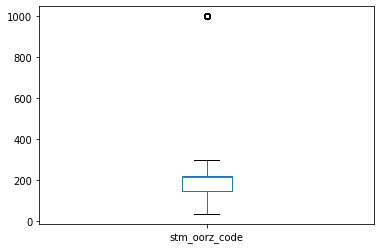

In [46]:
oorz_code = df2['stm_oorz_code'].sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = oorz_code.quantile(0.25)
q3 = oorz_code.quantile(0.75)
iqr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = oorz_code[(oorz_code<=q1-1.5*iqr)&(oorz_code>q1-3*iqr)].count()
sterke_lower = oorz_code[oorz_code<q1-3*iqr].count()
zwakke_upper = oorz_code[(oorz_code>=q3+1.5*iqr)&(oorz_code<q3+3*iqr)].count()
sterke_upper = oorz_code[oorz_code>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(oorz_code)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))

df2['stm_oorz_code'].plot.box()
# Deze kan de storingen die een code hebben van 999.0. Er moet met de PO eerst besproken worden of ze daadwerkelijk outliers zijn of kan we ze beschouwen als data.

Q1 = 2.0, Q3 = 5.0
IQR = Q3 - Q1 = 2.0 - 5.0 = 3.0
Lengte van de data : 898526

Aantal sterke outliers boven de boxplot, boven de 14.0 : 0
Aantal zwakke outliers boven de boxplot, tussen 9.5 en 14.0 : 0


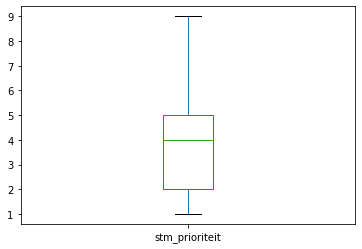

In [47]:
oorz_code = df2['stm_prioriteit'].sort_values() # sorteer de data

# bereken de Q1, Q3 en de IQR 
q1 = oorz_code.quantile(0.25)
q3 = oorz_code.quantile(0.75)
iqr = q3-q1
print("Q1 = {}, Q3 = {}".format(q1, q3)) 
print("IQR = Q3 - Q1 = {} - {} = {}".format(q1,q3,iqr))

# Bereken het aantal zwakke en sterke outliers boven en onder de boxplot.
zwakke_lower = oorz_code[(oorz_code<=q1-1.5*iqr)&(oorz_code>q1-3*iqr)].count()
sterke_lower = oorz_code[oorz_code<q1-3*iqr].count()
zwakke_upper = oorz_code[(oorz_code>=q3+1.5*iqr)&(oorz_code<q3+3*iqr)].count()
sterke_upper = oorz_code[oorz_code>q3+3*iqr].count()

print("Lengte van de data : {}".format(len(oorz_code)))
print()
print("Aantal sterke outliers boven de boxplot, boven de {} : {}".format(q3+3*iqr, sterke_upper))
print("Aantal zwakke outliers boven de boxplot, tussen {} en {} : {}".format(q3+1.5*iqr,q3+3*iqr, zwakke_upper))

df2['stm_prioriteit'].plot.box() 
# Uit de boxplot is er geen sprake van uitschieters en de kolom lijkt wel te kloppen.

In [ ]:
# De berkening voor de sterke en zwakke uitschieters is te zien in de uitwerking voor de baseline model.
# PO vragen : Wil uj dat we alles boven de 826 min nemen. Wat is volgens u de maximale reparatietijd dat u wil voospeld kan worden?
# Hierdoor kunnen we de rijen filteren van de stm_fh_duur.

### Data Preparation 

In [53]:
df2['stm_fh_duur'][df2['stm_fh_duur'] >100000].count()

613

In [51]:
df2['stm_fh_duur'].count()

898488

In [52]:
df2['stm_fh_duur'].mean()

923.1487710464692

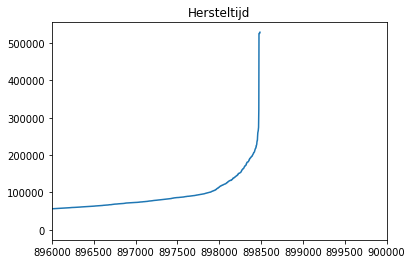

In [76]:
# Onze target variabel plotten in een 
x = range(0,len(df2))
plt.plot(x,df2['stm_fh_duur'].sort_values())
plt.xlim(896000, 900000)
#plt.ylim(100000, 300000)
plt.title('Hersteltijd')
plt.show()


In [74]:
# We kunnen op base van observatie, de maximale reparatietijd die we gaat voorspellen , gebruiken om onze dataset te filteren.
#  # TODO : maximal reparatie bereken 

In [78]:
df2['stm_fh_duur'][df2['stm_fh_duur']<= 30].count()

283309

In [87]:
n = df2['stm_fh_duur'].groupby(df2['stm_fh_duur']).count()
n.iloc[0:31]

stm_fh_duur
0.0     171713
1.0       2835
2.0       3558
3.0       6389
4.0       5241
5.0       6825
6.0       5599
7.0       5389
8.0       5215
9.0       4692
10.0      4638
11.0      4300
12.0      4081
13.0      3684
14.0      3431
15.0      3536
16.0      3163
17.0      3194
18.0      2983
19.0      2880
20.0      3050
21.0      2782
22.0      2918
23.0      2755
24.0      2652
25.0      2677
26.0      2614
27.0      2602
28.0      2572
29.0      2604
30.0      2737
Name: stm_fh_duur, dtype: int64

In [89]:
]

stm_fh_duur
0.0     171713
1.0       2835
2.0       3558
3.0       6389
4.0       5241
5.0       6825
6.0       5599
7.0       5389
8.0       5215
9.0       4692
10.0      4638
11.0      4300
12.0      4081
13.0      3684
14.0      3431
15.0      3536
16.0      3163
17.0      3194
18.0      2983
19.0      2880
20.0      3050
21.0      2782
22.0      2918
23.0      2755
24.0      2652
25.0      2677
26.0      2614
27.0      2602
28.0      2572
29.0      2604
30.0      2737
Name: stm_fh_duur, dtype: int64